#📌 Extracción

---



In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URL del JSON en formato raw de GitHub
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'


In [3]:
# Solicitar los datos desde la URL
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

In [4]:
# Mostrar las primeras filas del DataFrame

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

---



In [5]:
#Explorar las columnas del dataset y verificar sus tipos de datos.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
# Desglose de la columna «cliente»
customer_df = pd.json_normalize(df['customer'])

# Desglose de la columna «teléfono»
phone_df = pd.json_normalize(df['phone'])

# Desglose de la columna «internet»
internet_df = pd.json_normalize(df['internet'])

# Desglose de la columna «cuenta»
account_df = pd.json_normalize(df['account'])

# Concatenar los DataFrames desempaquetados con el DataFrame original (excluyendo las columnas anidadas originales).
df = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

# Mostrar las primeras filas del DataFrame transformado
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
print("Diccionario de variables:")
print("--------------------------")

print("customerID: Identificador único para cada cliente.")
print("Churn: Variable objetivo. Indica si un cliente se ha dado de baja ('Yes') o no ('No').")
print("customer:")
print("  gender: Género del cliente (Male/Female).")
print("  SeniorCitizen: Indica si el cliente es ciudadano senior (1: Sí, 0: No).")
print("  Partner: Indica si el cliente tiene pareja (Yes/No).")
print("  Dependents: Indica si el cliente tiene dependientes (Yes/No).")
print("phone:")
print("  PhoneService: Indica si el cliente tiene servicio telefónico (Yes/No).")
print("  MultipleLines: Indica si el cliente tiene múltiples líneas telefónicas (Yes/No/No phone service).")
print("internet:")
print("  InternetService: Tipo de servicio de internet del cliente (DSL/Fiber optic/No).")
print("  OnlineSecurity: Indica si el cliente tiene servicio de seguridad en línea (Yes/No/No internet service).")
print("  OnlineBackup: Indica si el cliente tiene servicio de copia de seguridad en línea (Yes/No/No internet service).")
print("  DeviceProtection: Indica si el cliente tiene servicio de protección de dispositivos (Yes/No/No internet service).")
print("  TechSupport: Indica si el cliente tiene servicio de soporte técnico (Yes/No/No internet service).")
print("  StreamingTV: Indica si el cliente tiene servicio de streaming de TV (Yes/No/No internet service).")
print("  StreamingMovies: Indica si el cliente tiene servicio de streaming de películas (Yes/No/No internet service).")
print("account:")
print("  tenure: Número de meses que el cliente ha estado con la empresa.")
print("  Contract: Tipo de contrato del cliente (Month-to-month/One year/Two year).")
print("  PaperlessBilling: Indica si el cliente tiene facturación electrónica (Yes/No).")
print("  PaymentMethod: Método de pago del cliente.")
print("  Charges:")
print("    MonthlyCharges: Cantidad cobrada al cliente mensualmente.")
print("    TotalCharges: Cantidad total cobrada al cliente hasta la fecha.")

print("\nEste diccionario describe las variables presentes en el DataFrame después de la transformación, incluyendo las columnas desempaquetadas de las estructuras anidadas originales.")


Diccionario de variables:
--------------------------
customerID: Identificador único para cada cliente.
Churn: Variable objetivo. Indica si un cliente se ha dado de baja ('Yes') o no ('No').
customer:
  gender: Género del cliente (Male/Female).
  SeniorCitizen: Indica si el cliente es ciudadano senior (1: Sí, 0: No).
  Partner: Indica si el cliente tiene pareja (Yes/No).
  Dependents: Indica si el cliente tiene dependientes (Yes/No).
phone:
  PhoneService: Indica si el cliente tiene servicio telefónico (Yes/No).
  MultipleLines: Indica si el cliente tiene múltiples líneas telefónicas (Yes/No/No phone service).
internet:
  InternetService: Tipo de servicio de internet del cliente (DSL/Fiber optic/No).
  OnlineSecurity: Indica si el cliente tiene servicio de seguridad en línea (Yes/No/No internet service).
  OnlineBackup: Indica si el cliente tiene servicio de copia de seguridad en línea (Yes/No/No internet service).
  DeviceProtection: Indica si el cliente tiene servicio de protección d

In [8]:
# Tipos

df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [9]:
# Verificar valores ausentes
print("\nValores ausentes por columna:")
print(df.isnull().sum())


Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [10]:
# Verificar duplicados
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0


In [11]:
# Verificar errores de formato e inconsistencias en categorías para columnas categóricas
print("\nAnálisis de columnas categóricas:")
for col in df.select_dtypes(include='object').columns:
    if col not in ['MonthlyCharges', 'TotalCharges', 'customerID']: # Excluir columnas numéricas tratadas como objeto y customerID
        print(f"\nColumna: {col}")
        print(df[col].value_counts())


Análisis de columnas categóricas:

Columna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Columna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

Columna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Columna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Columna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Columna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Columna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Columna: OnlineSecurity
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

Columna: OnlineBackup
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: 

In [12]:
# Eliminar las filas en las que «Churn» es una cadena vacía.
df = df[df['Churn'] != ''].copy()

# Verificar los cambios
print("\nValue counts for Churn after removing empty strings:")
print(df['Churn'].value_counts())


Value counts for Churn after removing empty strings:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [13]:
# Verificar valores no numéricos en columnas numéricas (Charges.Monthly y Charges.Total)
print("\nAnálisis de columnas numéricas tratadas como objeto:")
for col in ['Charges.Monthly', 'Charges.Total']:
    print(f"\nColumna: {col}")
    # Intentar convertir a numérico, los errores indicarán valores no numéricos
    # For 'Charges.Total', handle potential errors like empty strings by coercing to NaN
    if col == 'Charges.Total':
        non_numeric_values = pd.to_numeric(df[col], errors='coerce').isnull()
    else: # 'Charges.Monthly' was already identified as float64, but keeping the check structure
         non_numeric_values = pd.to_numeric(df[col], errors='coerce').isnull()

    print(f"Número de valores no numéricos/inválidos: {non_numeric_values.sum()}")
    if non_numeric_values.sum() > 0:
        print("Ejemplos de valores no numéricos:")
        # Display unique non-numeric values, but be mindful of potentially large output
        unique_non_numeric = df[col][non_numeric_values].unique()
        if len(unique_non_numeric) > 10: # Limit the number of examples shown
            print(unique_non_numeric[:10], '...')
        else:
            print(unique_non_numeric)

# Convert 'TotalCharges' to numeric, handling errors and filling NaNs with 0
# This part was in the next cell (-tey6RYQX98q) and is relevant to the data cleaning for these columns.
# It's better to perform the conversion after identifying non-numeric values.
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce').fillna(0)

# Verify the data types after conversion
print("\nVerificación de tipos de datos después de la conversión:")
print(df[['Charges.Monthly', 'Charges.Total']].dtypes)


Análisis de columnas numéricas tratadas como objeto:

Columna: Charges.Monthly
Número de valores no numéricos/inválidos: 0

Columna: Charges.Total
Número de valores no numéricos/inválidos: 11
Ejemplos de valores no numéricos:
[' ']

Verificación de tipos de datos después de la conversión:
Charges.Monthly    float64
Charges.Total      float64
dtype: object


In [14]:
# Convertir 'TotalCharges' a numérico, manejando los errores
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

In [15]:
df['Charges.Total'] = df['Charges.Total'].fillna(0)

In [16]:
print("\nVerificación post-limpieza (Charges.Total convertidos y nulos manejados):")
print(df.info())


Verificación post-limpieza (Charges.Total convertidos y nulos manejados):
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7

In [17]:
print("\nValores únicos para cada columna categórica (después de la limpieza de Churn):")
for col in df.select_dtypes(include='object').columns:
    if col not in ['Charges.Monthly', 'Charges.Total', 'customerID', 'Churn']: # Excluir columnas numéricas y IDs, y Churn ya verificado
        print(f"\nColumna: {col}")
        print(df[col].unique())


Valores únicos para cada columna categórica (después de la limpieza de Churn):

Columna: gender
['Female' 'Male']

Columna: Partner
['Yes' 'No']

Columna: Dependents
['Yes' 'No']

Columna: PhoneService
['Yes' 'No']

Columna: MultipleLines
['No' 'Yes' 'No phone service']

Columna: InternetService
['DSL' 'Fiber optic' 'No']

Columna: OnlineSecurity
['No' 'Yes' 'No internet service']

Columna: OnlineBackup
['Yes' 'No' 'No internet service']

Columna: DeviceProtection
['No' 'Yes' 'No internet service']

Columna: TechSupport
['Yes' 'No' 'No internet service']

Columna: StreamingTV
['Yes' 'No' 'No internet service']

Columna: StreamingMovies
['No' 'Yes' 'No internet service']

Columna: Contract
['One year' 'Month-to-month' 'Two year']

Columna: PaperlessBilling
['Yes' 'No']

Columna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas numéricas para normalizar (tenure, Charges.Monthly, Charges.Total)
# Asegúrate de que estas columnas sean de tipo numérico (int o float) antes de normalizar
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a las columnas seleccionadas
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nDataFrame después de la normalización de las columnas numéricas:")
display(df.head())

print("\Estadísticas descriptivas de las columnas numéricas normalizadas:")
print(df[numeric_cols].describe())


DataFrame después de la normalización de las columnas numéricas:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,0.125000,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,0.471144,0.068315
1,0003-MKNFE,No,Male,0,No,No,0.125000,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,0.414428,0.062454
2,0004-TLHLJ,Yes,Male,0,No,No,0.055556,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.553731,0.032338
3,0011-IGKFF,Yes,Male,1,Yes,No,0.180556,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.793532,0.142531
4,0013-EXCHZ,Yes,Female,1,Yes,No,0.041667,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0.653234,0.030789


\Estadísticas descriptivas de las columnas numéricas normalizadas:
            tenure  Charges.Monthly  Charges.Total
count  7043.000000      7043.000000    7043.000000
mean      0.449599         0.462803       0.262497
std       0.341104         0.299403       0.261007
min       0.000000         0.000000       0.000000
25%       0.125000         0.171642       0.045891
50%       0.402778         0.518408       0.160574
75%       0.763889         0.712438       0.436003
max       1.000000         1.000000       1.000000


In [19]:
# columna "Cuentas_Diarias"

df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

In [22]:
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,0.125000,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,0.471144,0.068315,0.015705
1,0003-MKNFE,No,Male,0,No,No,0.125000,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,0.414428,0.062454,0.013814
2,0004-TLHLJ,Yes,Male,0,No,No,0.055556,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.553731,0.032338,0.018458
3,0011-IGKFF,Yes,Male,1,Yes,No,0.180556,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.793532,0.142531,0.026451
4,0013-EXCHZ,Yes,Female,1,Yes,No,0.041667,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0.653234,0.030789,0.021774


In [39]:
df.rename(columns={
    'tenure': 'meses_antiguedad',
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales',
    'Churn': 'evasión',
    'Contract': 'tipo_contrato',
    'PaymentMethod': 'método_pago',
    'InternetService': 'tipo_internet',
    'Cuentas_Diarias': 'cargos_diarios'
}, inplace=True)

In [29]:
# Identificar columnas con valores 'Yes' y 'No' (excluyendo 'Churn'/'evasión' ya que es la variable objetivo)
binary_cols = [col for col in df.columns if df[col].dtype == 'object' and
               df[col].isin(['Yes', 'No']).all() and col != 'evasión']

# Reemplazar 'Yes' con 1 y 'No' con 0 en las columnas identificadas
for col in binary_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

print("\nColumnas convertidas a binario:")
print(binary_cols)

print("\nPrimeras filas del DataFrame después de la conversión a binario:")
display(df.head())


Columnas convertidas a binario:
[]

Primeras filas del DataFrame después de la conversión a binario:


,customerID,evasión,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cargos_Mensuales,Cargos_Totales,cargos_diarios
0,0002-ORFBO,No,Female,0,1,1,0.125000,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,0.471144,0.068315,0.015705
1,0003-MKNFE,No,Male,0,0,0,0.125000,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,0.414428,0.062454,0.013814
2,0004-TLHLJ,Yes,Male,0,0,0,0.055556,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,0.553731,0.032338,0.018458
3,0011-IGKFF,Yes,Male,1,1,0,0.180556,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,0.793532,0.142531,0.026451
4,0013-EXCHZ,Yes,Female,1,1,0,0.041667,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,0.653234,0.030789,0.021774


#📊 Carga y análisis

---



In [31]:
# Realizar análisis descriptivo de las columnas numéricas
display(df.describe())

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Cargos_Mensuales,Cargos_Totales,cargos_diarios
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,0.449599,0.903166,0.592219,0.462803,0.262497,0.015427
std,0.368612,0.499748,0.458110,0.341104,0.295752,0.491457,0.299403,0.261007,0.009980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.171642,0.045891,0.005721
50%,0.000000,0.000000,0.000000,0.402778,1.000000,1.000000,0.518408,0.160574,0.017280
75%,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,0.712438,0.436003,0.023748
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.033333


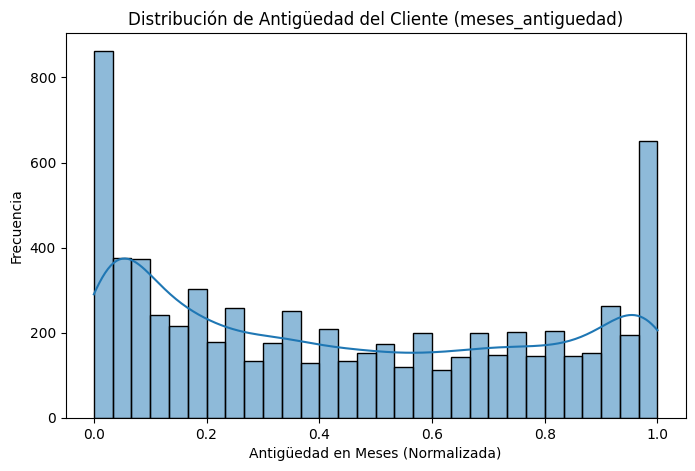

In [41]:
# Histograma para 'meses_antiguedad'
plt.figure(figsize=(8, 5))
sns.histplot(df['meses_antiguedad'], bins=30, kde=True)
plt.title('Distribución de Antigüedad del Cliente (meses_antiguedad)')
plt.xlabel('Antigüedad en Meses (Normalizada)')
plt.ylabel('Frecuencia')
plt.show()

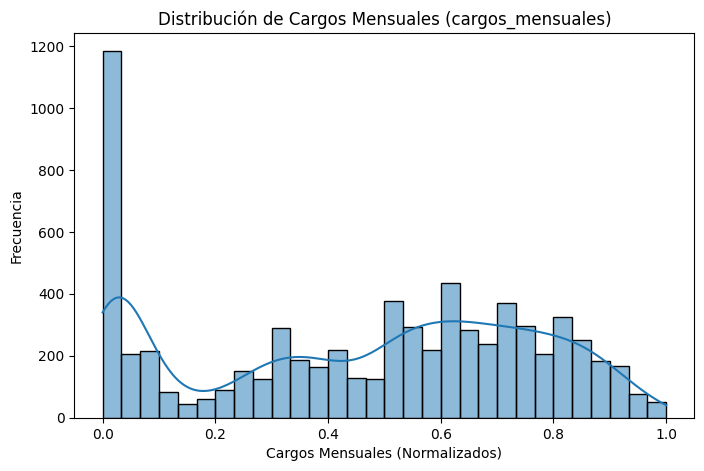

In [58]:
# Histograma para 'cargos_mensuales'
plt.figure(figsize=(8, 5))
sns.histplot(df['cargos_mensuales'], bins=30, kde=True)
plt.title('Distribución de Cargos Mensuales (cargos_mensuales)')
plt.xlabel('Cargos Mensuales (Normalizados)')
plt.ylabel('Frecuencia')
plt.show()

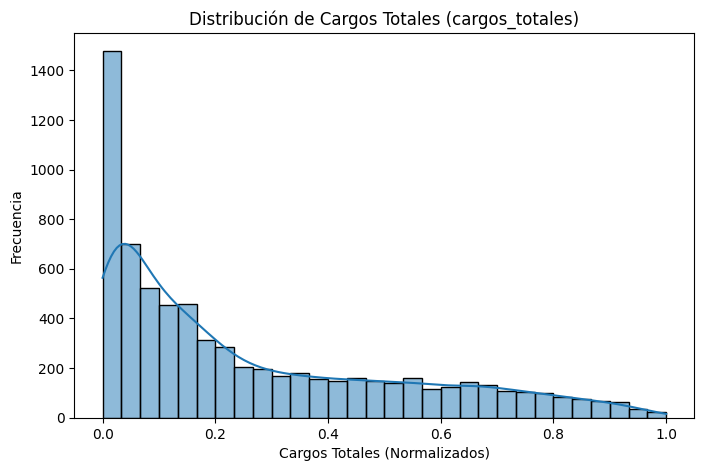

In [59]:
# Histograma para 'cargos_totales'
plt.figure(figsize=(8, 5))
sns.histplot(df['cargos_totales'], bins=30, kde=True)
plt.title('Distribución de Cargos Totales (cargos_totales)')
plt.xlabel('Cargos Totales (Normalizados)')
plt.ylabel('Frecuencia')
plt.show()

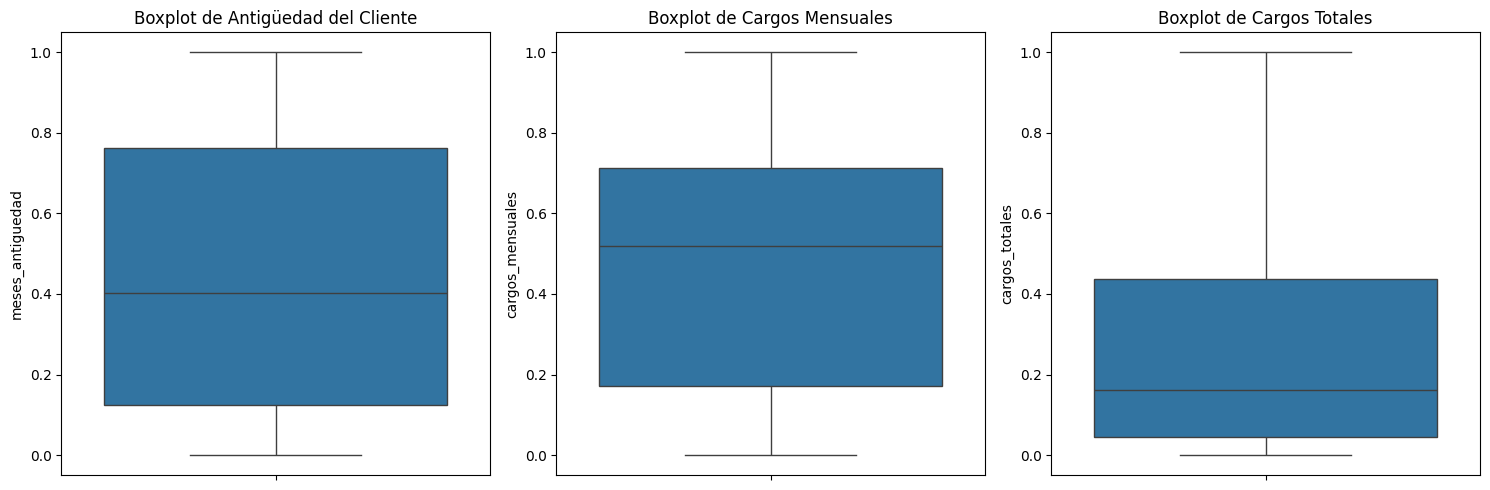

In [60]:
# Boxplot para identificar posibles outliers en columnas numéricas clave
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['meses_antiguedad'])
plt.title('Boxplot de Antigüedad del Cliente')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['cargos_mensuales'])
plt.title('Boxplot de Cargos Mensuales')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['cargos_totales'])
plt.title('Boxplot de Cargos Totales')

plt.tight_layout()
plt.show()

In [61]:
# Contar la distribución de la variable objetivo 'evasión' (Churn)
print("\nDistribución de la variable objetivo (evasión):")
print(df['evasión'].value_counts())
print(df['evasión'].value_counts(normalize=True) * 100) # Porcentaje


Distribución de la variable objetivo (evasión):
evasión
No     5174
Yes    1869
Name: count, dtype: int64
evasión
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


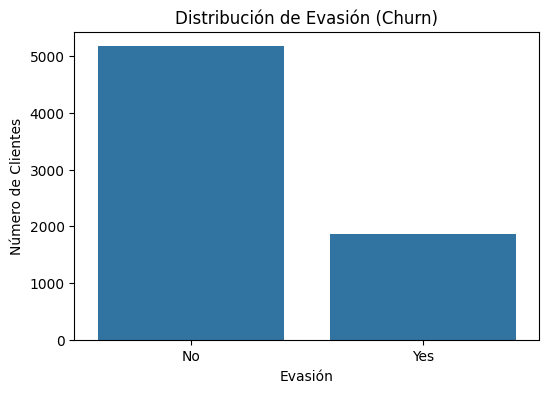

In [62]:
# Visualización de la distribución de 'evasión'
plt.figure(figsize=(6, 4))
sns.countplot(x='evasión', data=df)
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Evasión')
plt.ylabel('Número de Clientes')
plt.show()


Matriz de Correlación de Variables Numéricas:


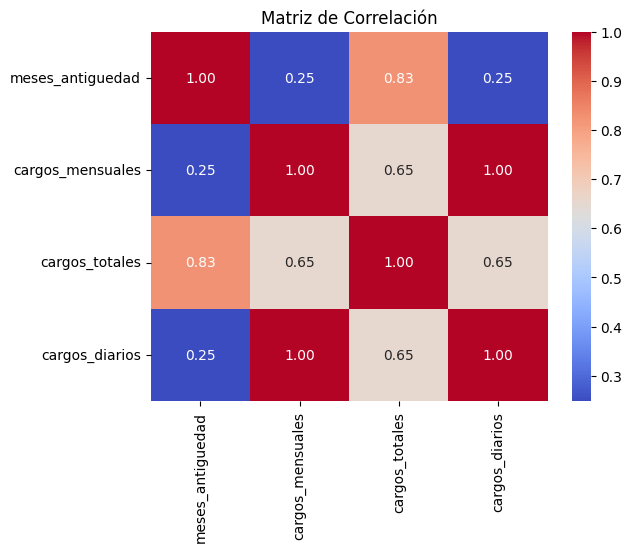

In [64]:
# Análisis de correlación entre variables numéricas
print("\nMatriz de Correlación de Variables Numéricas:")
# Usar los nombres de columna correctos y incluir todas las numéricas relevantes
numeric_cols = ['meses_antiguedad', 'cargos_mensuales', 'cargos_totales', 'cargos_diarios']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [66]:
# Columnas categóricas de interés
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'tipo_internet', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'tipo_contrato', 'PaperlessBilling', 'método_pago']

<Figure size 1000x600 with 0 Axes>

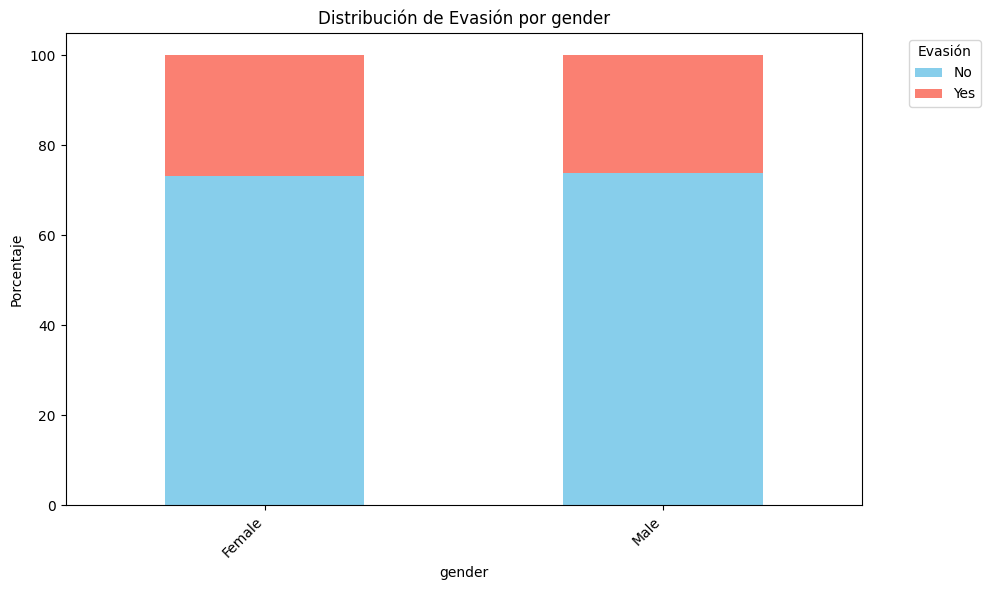


Porcentaje de Evasión por gender:
evasión         No        Yes
gender                       
Female   73.079128  26.920872
Male     73.839662  26.160338
------------------------------


<Figure size 1000x600 with 0 Axes>

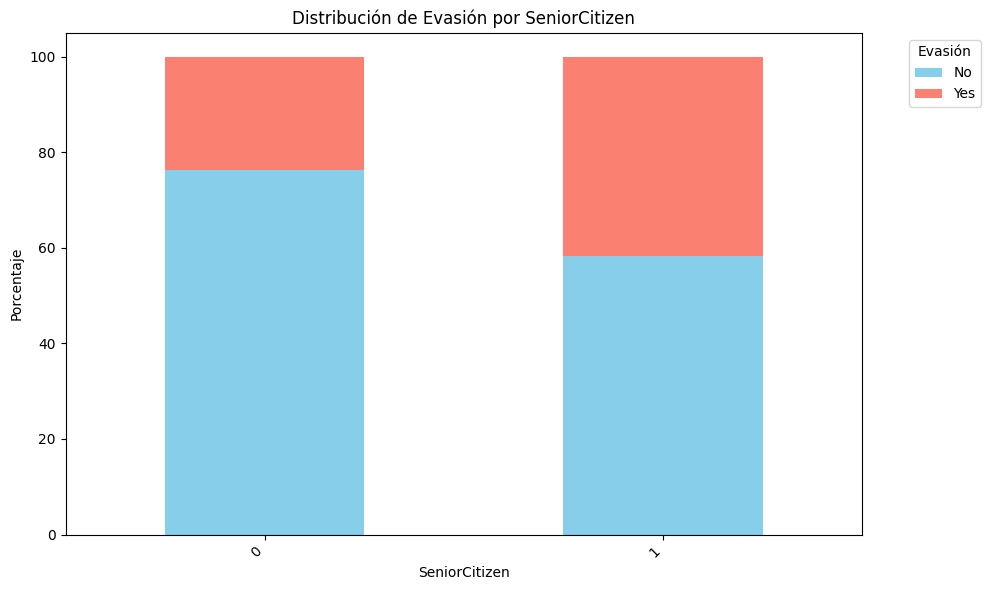


Porcentaje de Evasión por SeniorCitizen:
evasión               No        Yes
SeniorCitizen                      
0              76.393832  23.606168
1              58.318739  41.681261
------------------------------


<Figure size 1000x600 with 0 Axes>

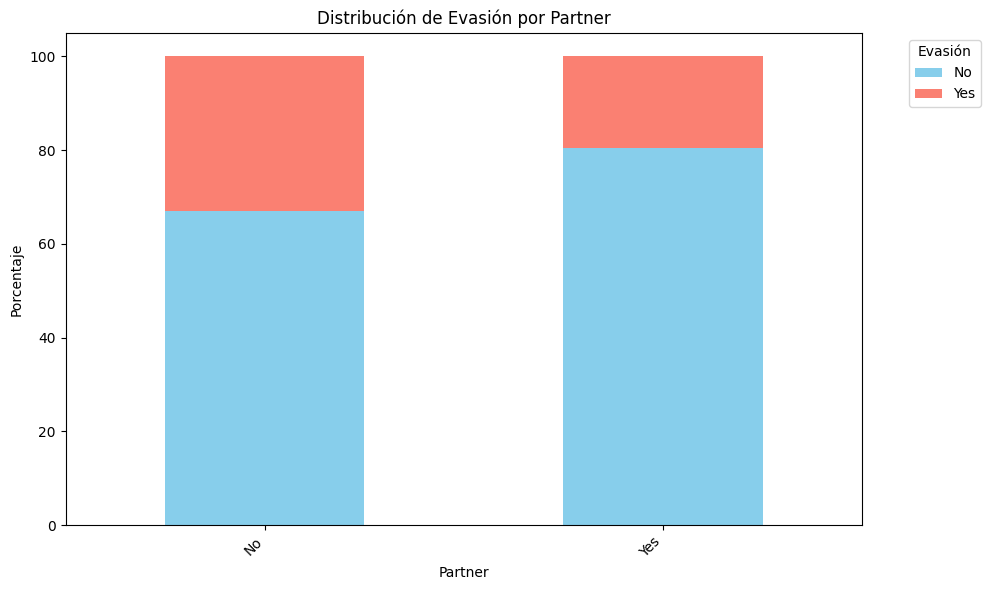


Porcentaje de Evasión por Partner:
evasión         No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903
------------------------------


<Figure size 1000x600 with 0 Axes>

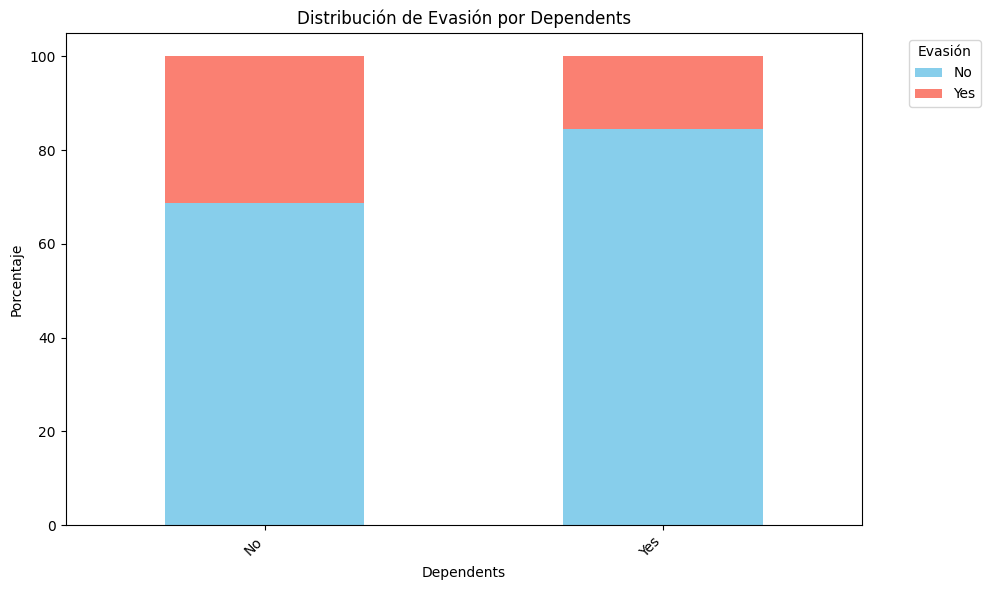


Porcentaje de Evasión por Dependents:
evasión            No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237
------------------------------


<Figure size 1000x600 with 0 Axes>

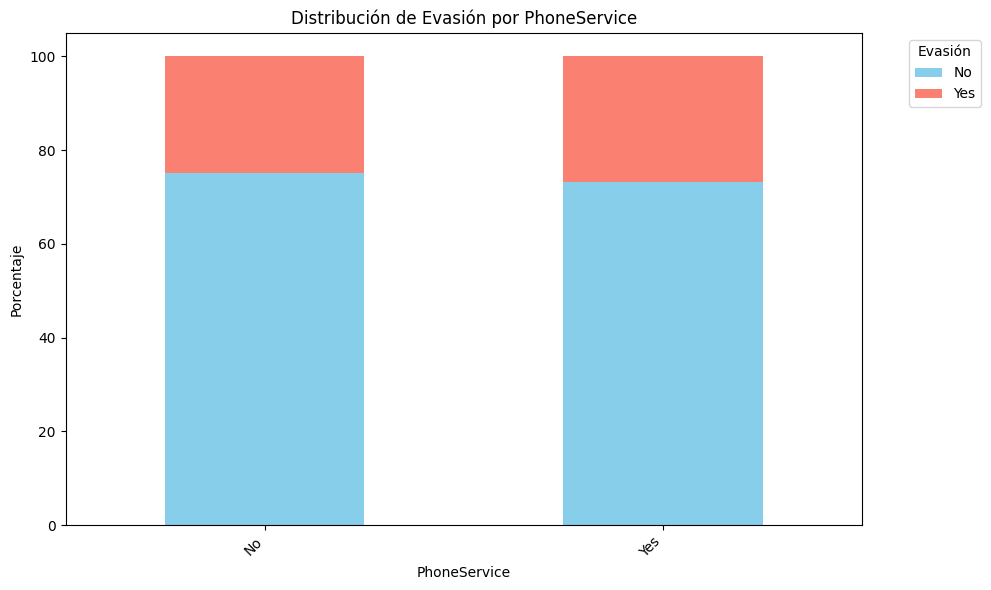


Porcentaje de Evasión por PhoneService:
evasión              No        Yes
PhoneService                      
No            75.073314  24.926686
Yes           73.290363  26.709637
------------------------------


<Figure size 1000x600 with 0 Axes>

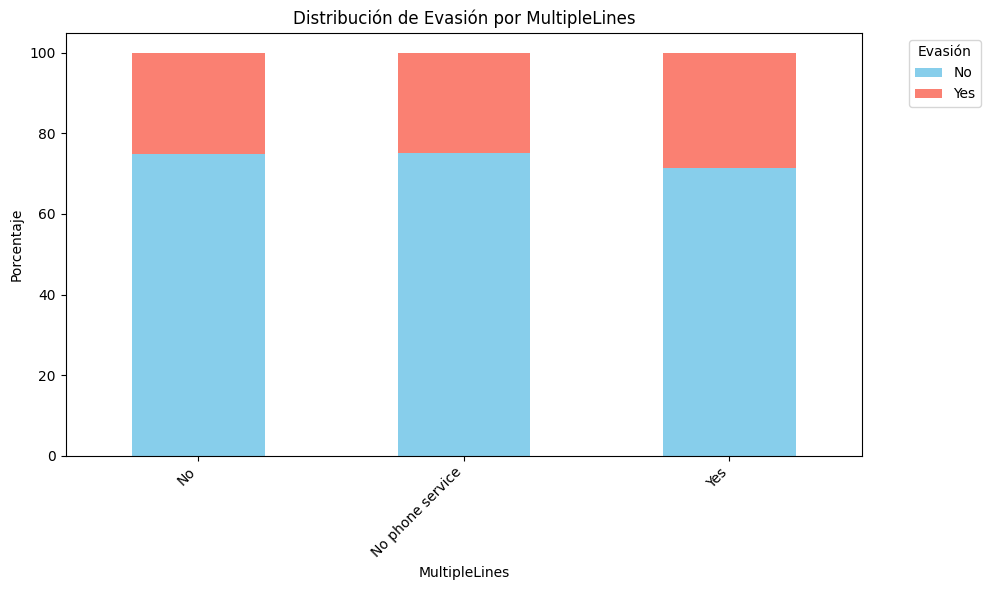


Porcentaje de Evasión por MultipleLines:
evasión                  No        Yes
MultipleLines                         
No                74.955752  25.044248
No phone service  75.073314  24.926686
Yes               71.390104  28.609896
------------------------------


<Figure size 1000x600 with 0 Axes>

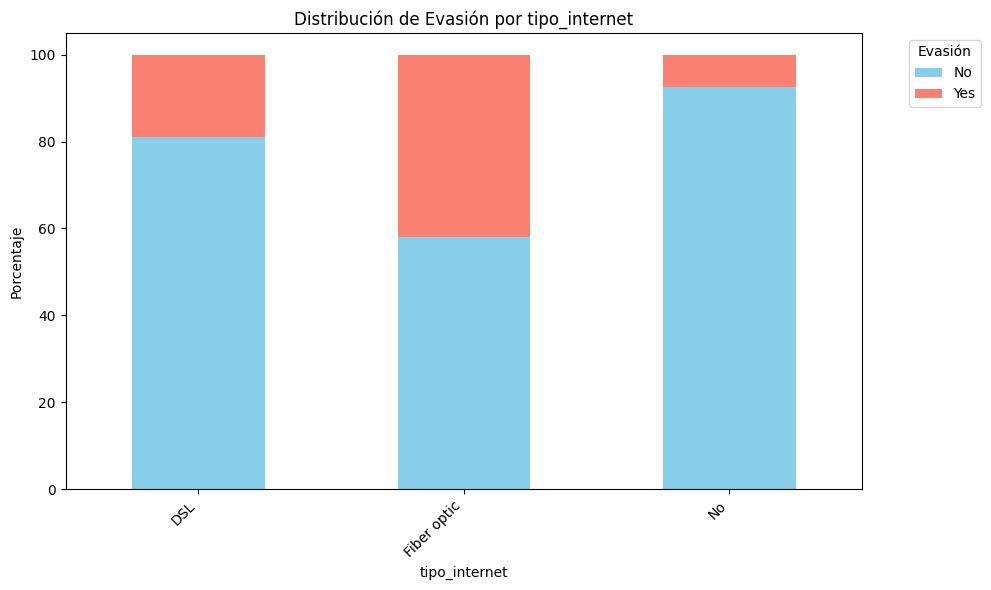


Porcentaje de Evasión por tipo_internet:
evasión               No        Yes
tipo_internet                      
DSL            81.040892  18.959108
Fiber optic    58.107235  41.892765
No             92.595020   7.404980
------------------------------


<Figure size 1000x600 with 0 Axes>

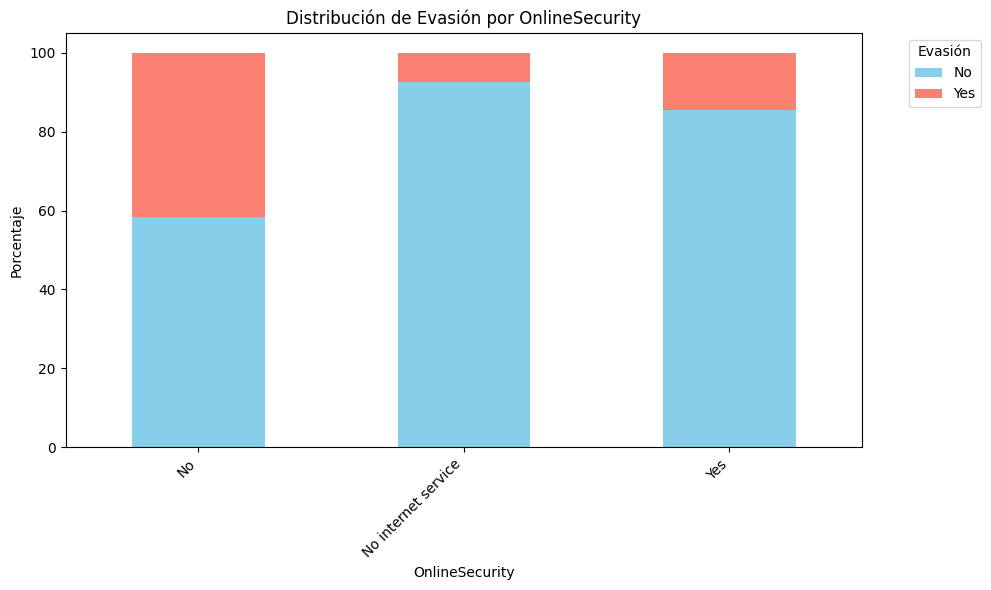


Porcentaje de Evasión por OnlineSecurity:
evasión                     No        Yes
OnlineSecurity                           
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194
------------------------------


<Figure size 1000x600 with 0 Axes>

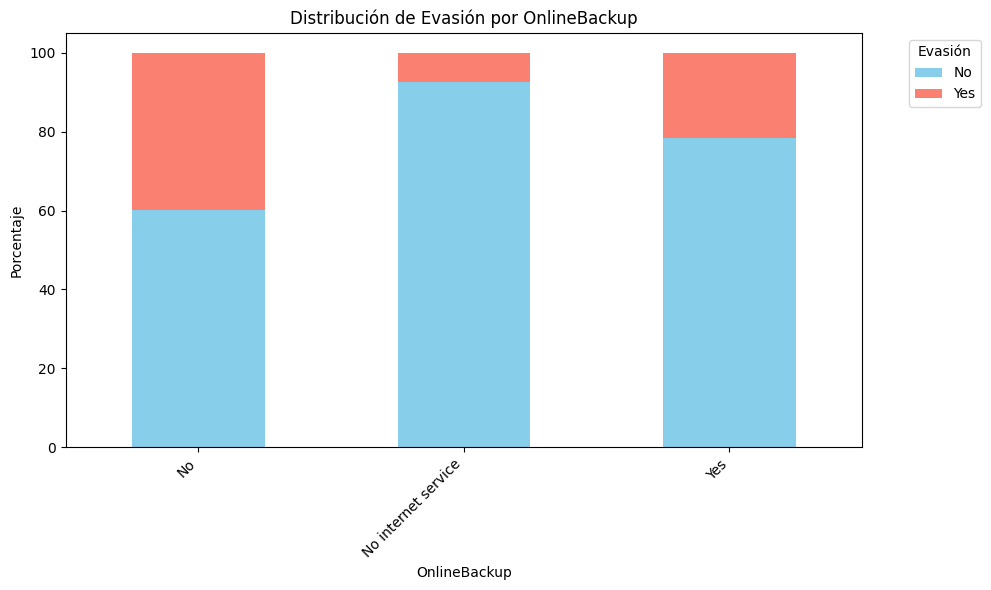


Porcentaje de Evasión por OnlineBackup:
evasión                     No        Yes
OnlineBackup                             
No                   60.071244  39.928756
No internet service  92.595020   7.404980
Yes                  78.468506  21.531494
------------------------------


<Figure size 1000x600 with 0 Axes>

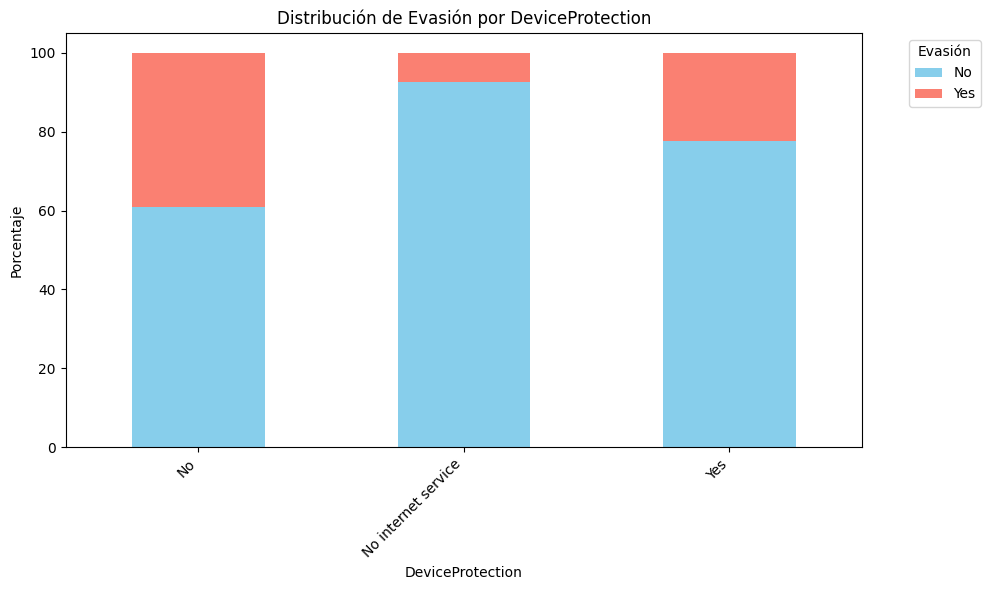


Porcentaje de Evasión por DeviceProtection:
evasión                     No        Yes
DeviceProtection                         
No                   60.872375  39.127625
No internet service  92.595020   7.404980
Yes                  77.497936  22.502064
------------------------------


<Figure size 1000x600 with 0 Axes>

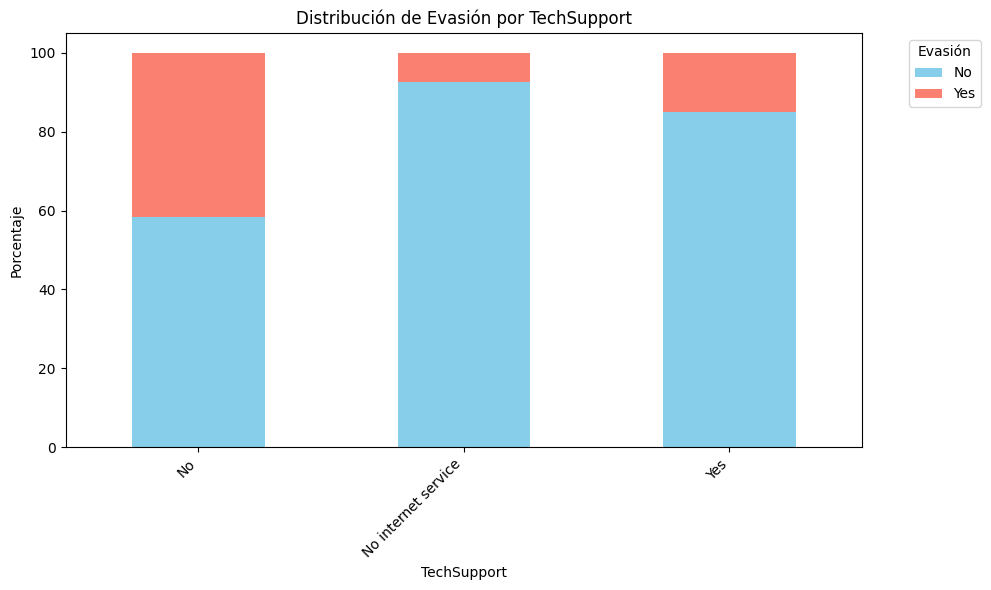


Porcentaje de Evasión por TechSupport:
evasión                     No        Yes
TechSupport                              
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341
------------------------------


<Figure size 1000x600 with 0 Axes>

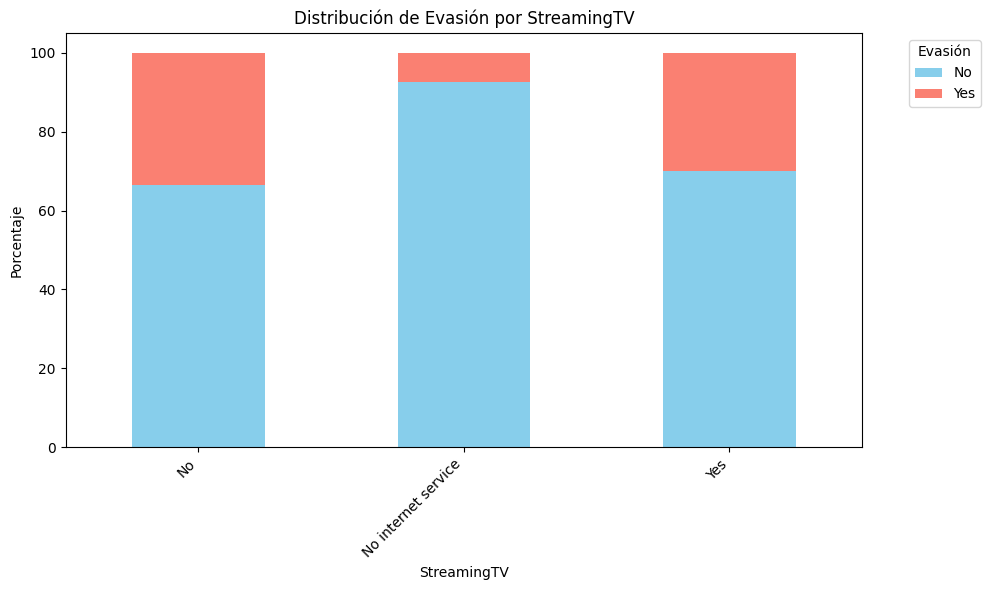


Porcentaje de Evasión por StreamingTV:
evasión                     No        Yes
StreamingTV                              
No                   66.476868  33.523132
No internet service  92.595020   7.404980
Yes                  69.929812  30.070188
------------------------------


<Figure size 1000x600 with 0 Axes>

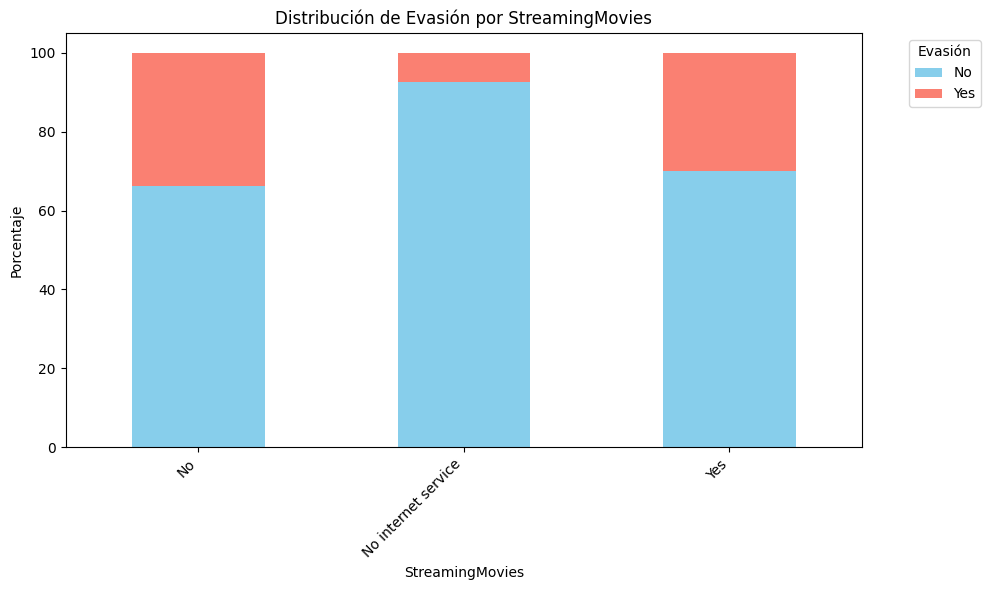


Porcentaje de Evasión por StreamingMovies:
evasión                     No        Yes
StreamingMovies                          
No                   66.319569  33.680431
No internet service  92.595020   7.404980
Yes                  70.058565  29.941435
------------------------------


<Figure size 1000x600 with 0 Axes>

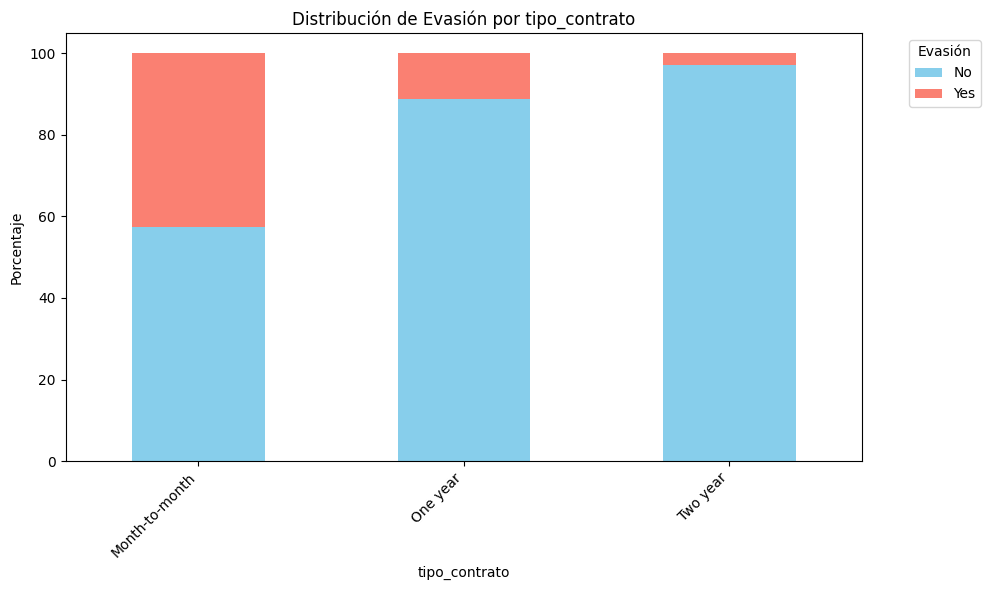


Porcentaje de Evasión por tipo_contrato:
evasión                No        Yes
tipo_contrato                       
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858
------------------------------


<Figure size 1000x600 with 0 Axes>

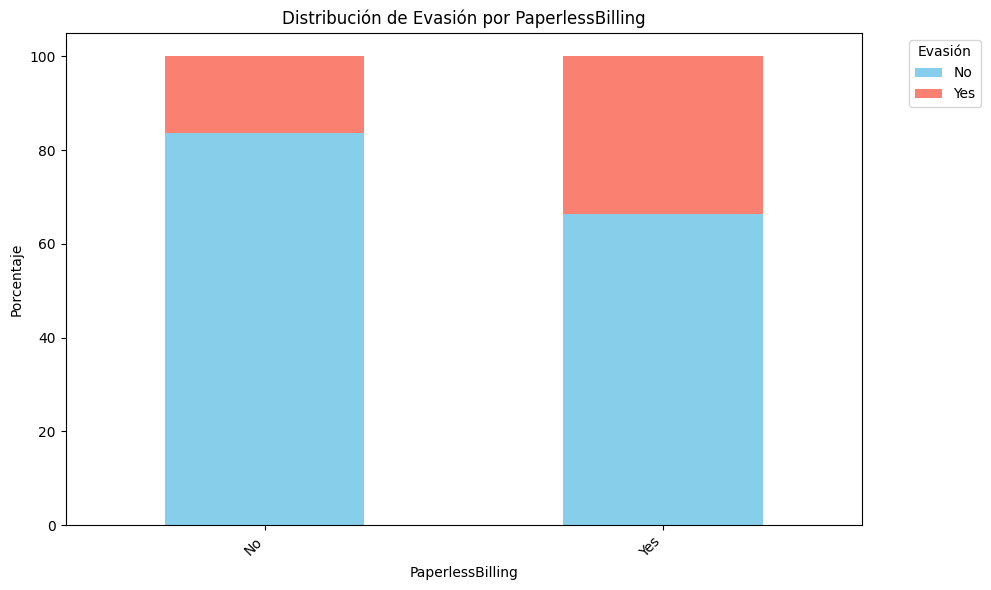


Porcentaje de Evasión por PaperlessBilling:
evasión                  No        Yes
PaperlessBilling                      
No                83.669916  16.330084
Yes               66.434908  33.565092
------------------------------


<Figure size 1000x600 with 0 Axes>

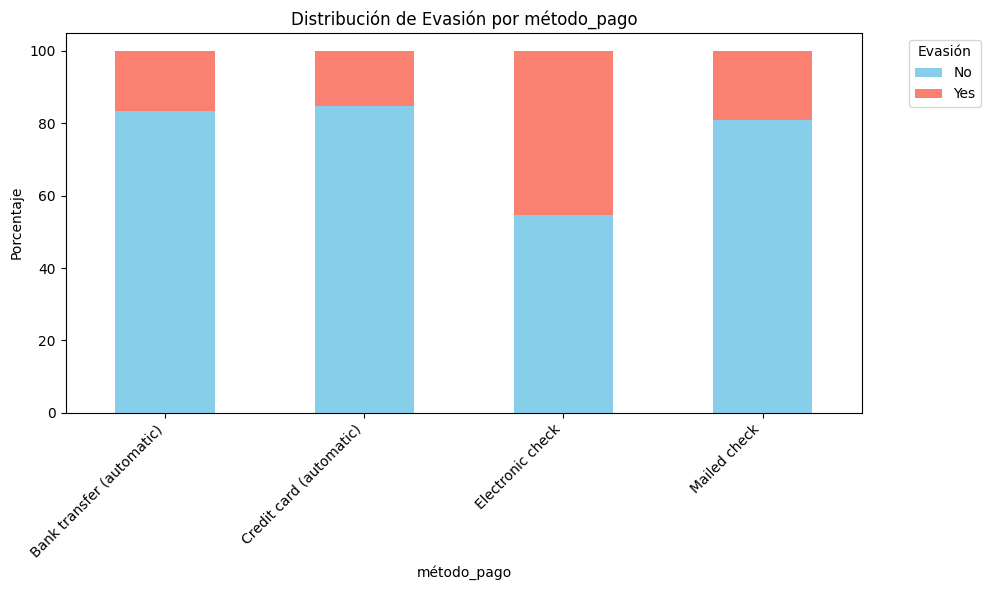


Porcentaje de Evasión por método_pago:
evasión                           No        Yes
método_pago                                    
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700
------------------------------


In [69]:
# Bucle para graficar la distribución de evasión para cada columna categórica
for col in categorical_cols:
    plt.figure(figsize=(10, 6))

# conteos de evasión por categoría y luego graficar
    churn_by_cat = pd.crosstab(df[col], df['evasión'], normalize='index') * 100
    churn_by_cat.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
    plt.title(f'Distribución de Evasión por {col}')
    plt.xlabel(col)
    plt.ylabel('Porcentaje')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Evasión', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

  # porcentajes en texto
    print(f"\nPorcentaje de Evasión por {col}:")
    print(churn_by_cat)
    print("-" * 30)

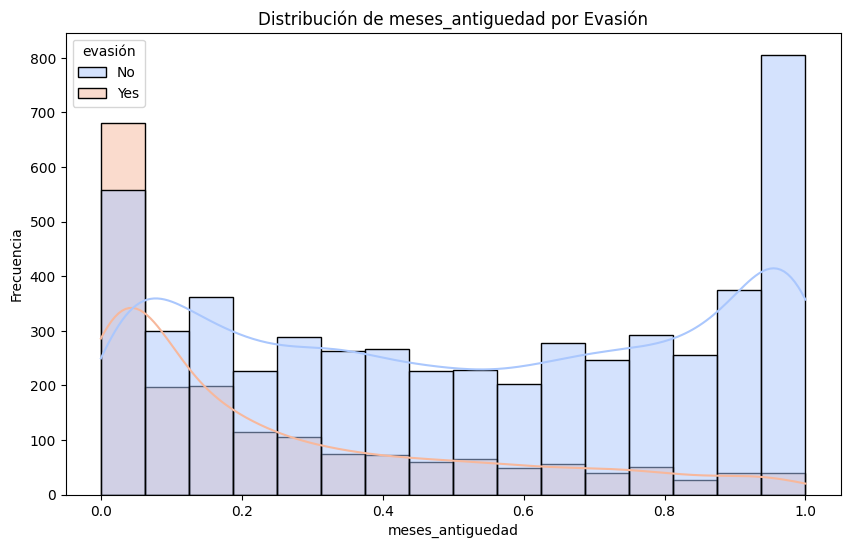

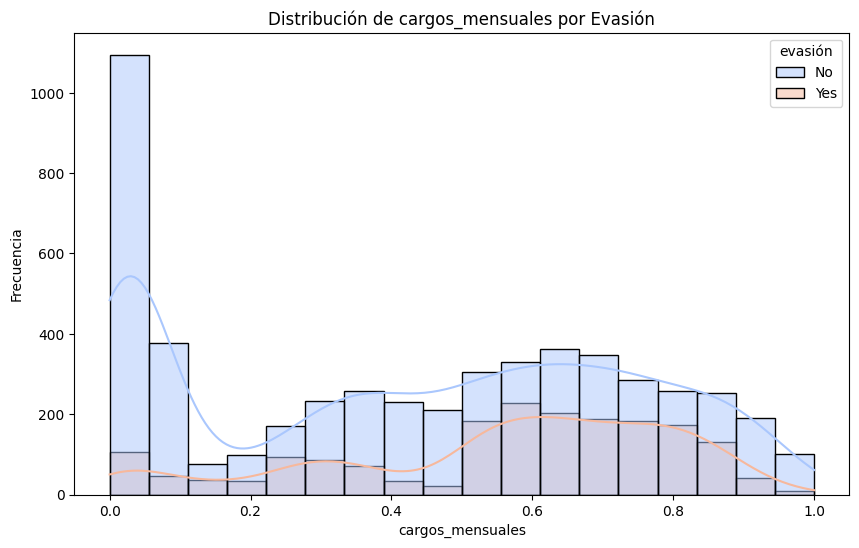

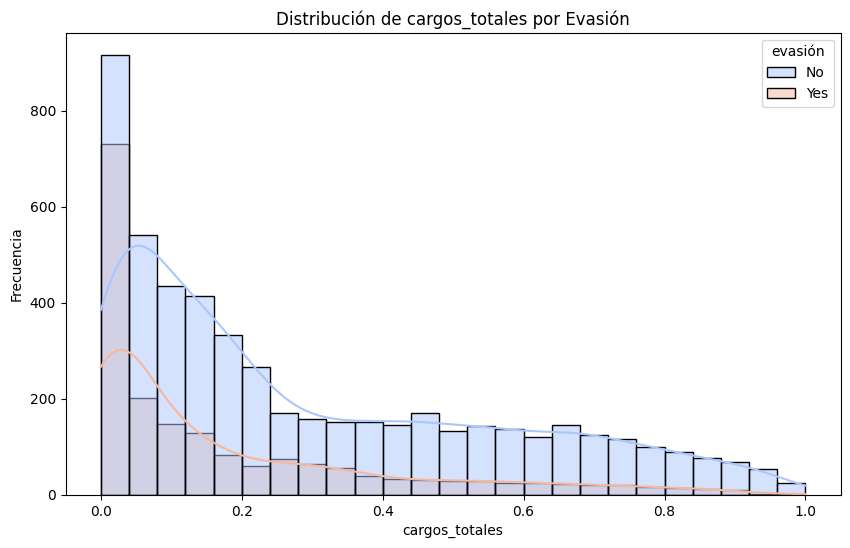

/tmp/ipython-input-70-2228812554.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='evasión', y=col, data=df, palette='coolwarm')


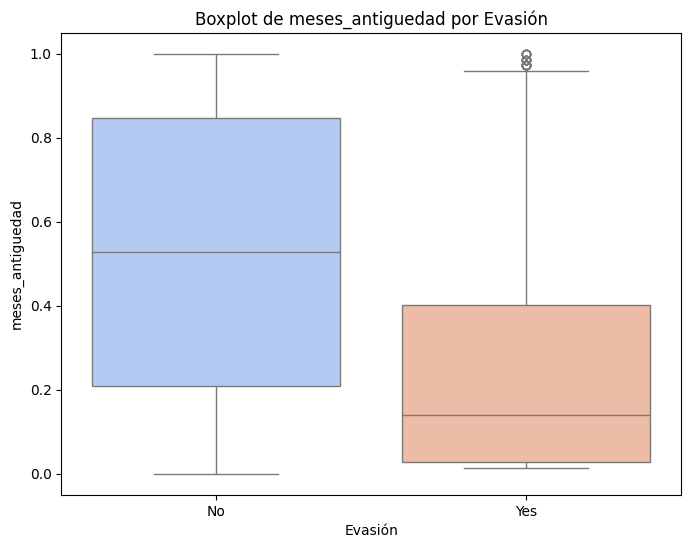

/tmp/ipython-input-70-2228812554.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='evasión', y=col, data=df, palette='coolwarm')


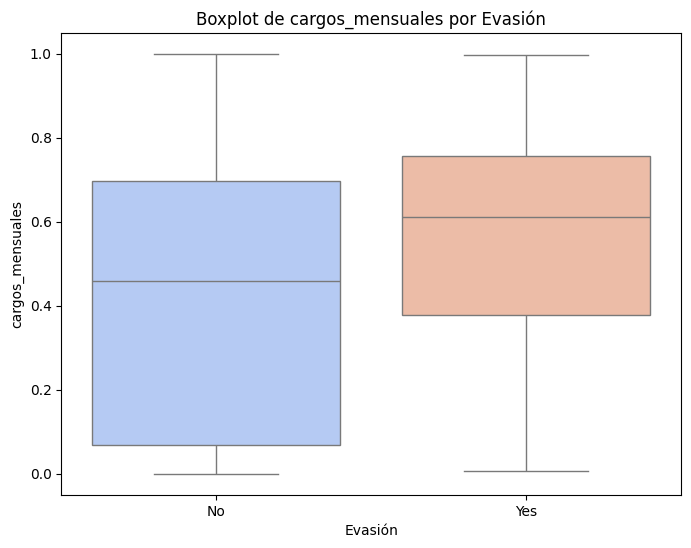

/tmp/ipython-input-70-2228812554.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='evasión', y=col, data=df, palette='coolwarm')


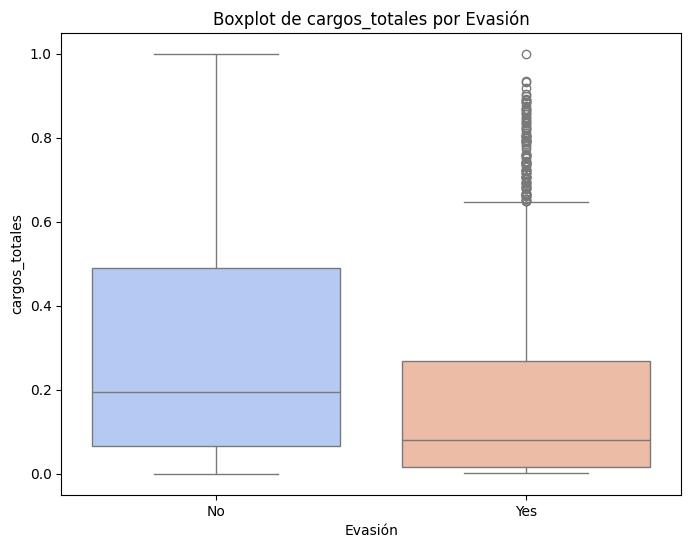

In [70]:
# Comparar la distribución de variables numéricas entre clientes que evadieron y los que no
numeric_analysis_cols = ['meses_antiguedad', 'cargos_mensuales', 'cargos_totales']

for col in numeric_analysis_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='evasión', kde=True, palette='coolwarm')
    plt.title(f'Distribución de {col} por Evasión')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# También es útil usar boxplots para comparar medianas y cuartiles
for col in numeric_analysis_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='evasión', y=col, data=df, palette='coolwarm')
    plt.title(f'Boxplot de {col} por Evasión')
    plt.xlabel('Evasión')
    plt.ylabel(col)
    plt.show()

#📄Informe final

---



📄 **Informe Final sobre el Análisis de Evasión de Clientes**

🔹 **Introducción**

El presente informe detalla el proceso de análisis de un conjunto de datos de Telecom con el objetivo primordial de comprender y predecir la evasión de clientes (Churn). La evasión de clientes es un desafío crítico para las empresas de telecomunicaciones, ya que implica una pérdida de ingresos y un aumento en los costos de adquisición de nuevos clientes. Identificar los factores que influyen en la decisión de un cliente de abandonar la compañía es fundamental para desarrollar estrategias de retención efectivas. Este análisis exploratorio se centra en examinar las características demográficas de los clientes, los servicios que contratan y su historial de cuenta para descubrir patrones asociados con la evasión.

🔹 **Limpieza y Tratamiento de Datos**

El proceso comenzó con la importación de los datos desde un archivo JSON alojado en GitHub. Los datos presentaban una estructura anidada, con información de `customer`, `phone`, `internet` y `account` agrupada en diccionarios dentro de las columnas principales.

Los pasos de limpieza y tratamiento incluyeron:

1.  **Desanidamiento de Columnas:** Las columnas anidadas (`customer`, `phone`, `internet`, `account`) fueron desglosadas en columnas individuales para facilitar el acceso a los datos.
2.  **Verificación de Tipos de Datos:** Se inspeccionaron los tipos de datos para asegurar su correcta interpretación, identificando que las columnas de cargos (`Charges.Monthly`, `Charges.Total`) estaban como tipo 'object' debido a la presencia de valores no numéricos.
3.  **Manejo de Valores Ausentes y Duplicados:** Se verificó la presencia de valores nulos (identificando algunos en `TotalCharges`) y filas duplicadas (ninguna encontrada). Las filas con cadenas vacías en la variable objetivo `Churn` fueron eliminadas para asegurar la calidad de los datos para el análisis de evasión.
4.  **Conversión de Tipos de Datos:** Las columnas `Charges.Monthly` y `Charges.Total` fueron convertidas a tipo numérico. Los valores no numéricos en `TotalCharges` fueron tratados como errores y se imputaron con 0, asumiendo que un cargo total de 0 indica una cuenta nueva o un error similar.
5.  **Verificación de Consistencia Categórica:** Se examinaron los valores únicos en las columnas categóricas para identificar posibles inconsistencias o errores de formato.
6.  **Normalización de Variables Numéricas:** Las columnas numéricas `tenure`, `Charges.Monthly`, y `Charges.Total` fueron normalizadas utilizando `MinMaxScaler`. Esto es crucial para futuros modelos de aprendizaje automático que sean sensibles a la escala de las variables.
7.  **Creación de Nueva Variable:** Se calculó una nueva variable, `cargos_diarios`, dividiendo los `cargos_mensuales` por 30.
8.  **Renombrado de Columnas:** Las columnas se renombraron a nombres más descriptivos en español para una mejor comprensión.
9.  **Codificación Binaria:** Las columnas categóricas binarias ('Yes'/'No') fueron convertidas a formato numérico (1/0) para su uso en análisis cuantitativos y visualizaciones.

Este proceso de limpieza y transformación aseguró que los datos estuvieran en un formato adecuado para el análisis exploratorio y la modelización futura.

🔹 **Análisis Exploratorio de Datos**

El análisis exploratorio de datos (AED) se centró en visualizar la distribución de las variables y examinar su relación con la variable objetivo 'evasión'.

*   **Distribución de Variables Numéricas:**
    *   Los histogramas de `meses_antiguedad`, `cargos_mensuales` y `cargos_totales` mostraron las distribuciones de la antigüedad y los cargos de los clientes. `meses_antiguedad` y `cargos_totales` mostraron distribuciones sesgadas hacia valores bajos, indicando una proporción significativa de clientes nuevos o con bajo historial. `cargos_mensuales` presentó una distribución más variada.
    *   Los boxplots confirmaron la distribución de estas variables y la ausencia de outliers extremos después de la normalización.

*   **Distribución de la Variable Objetivo (`evasión`):**
    *   El conteo de la variable `evasión` reveló un desbalance en las clases: una mayoría de clientes no ha evadido ('No') en comparación con los que sí lo han hecho ('Yes'). Esto es un hallazgo importante que deberá considerarse en la etapa de modelización.

*   **Correlación entre Variables Numéricas:**
    *   La matriz de correlación mostró una fuerte correlación positiva entre `meses_antiguedad`, `cargos_mensuales` y `cargos_totales`, lo cual es esperable ya que los clientes con más antigüedad tienden a acumular cargos totales más altos. No se observaron correlaciones extremadamente altas que sugirieran problemas de multicolinealidad severa entre las variables numéricas clave para este análisis exploratorio.

*   **Análisis de Evasión por Categoría:**
    *   Se examinó la proporción de evasión para cada categoría en las columnas categóricas. Algunas observaciones clave incluyeron:
        *   **Género:** La tasa de evasión fue similar entre hombres y mujeres.
        *   **Senior Citizen:** Los ciudadanos senior mostraron una tasa de evasión notablemente más alta que los no senior.
        *   **Partner y Dependents:** Los clientes sin pareja o dependientes tuvieron una mayor propensión a la evasión en comparación con aquellos que sí los tienen.
        *   **PhoneService y MultipleLines:** Tener servicio telefónico o múltiples líneas no pareció tener un impacto drástico en la tasa de evasión.
        *   **InternetService:** Los clientes con servicio de internet de Fibra Óptica tuvieron una tasa de evasión significativamente mayor que aquellos con DSL o sin servicio de internet.
        *   **Servicios Adicionales (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies):** Los clientes que *no* tenían estos servicios adicionales mostraron tasas de evasión más altas que aquellos que sí los tenían. Esto sugiere que estos servicios actúan como factores de retención.
        *   **Tipo de Contrato (`tipo_contrato`):** El tipo de contrato tuvo un impacto muy significativo. Los clientes con contratos mes a mes (`Month-to-month`) tuvieron una tasa de evasión drásticamente mayor que aquellos con contratos de un año o dos años. Los contratos de dos años mostraron la menor tasa de evasión.
        *   **Paperless Billing:** Los clientes con facturación electrónica (`Yes`) tuvieron una tasa de evasión más alta que aquellos sin ella.
        *   **PaymentMethod:** Los métodos de pago afectaron la tasa de evasión, con los pagos electrónicos (`Electronic check`) mostrando una tasa de evasión significativamente más alta en comparación con otros métodos.

*   **Comparación de Variables Numéricas por Evasión:**
    *   Los histogramas y boxplots que comparan las distribuciones de `meses_antiguedad`, `cargos_mensuales` y `cargos_totales` para clientes que evadieron y no evadieron revelaron que:
        *   Los clientes que evadieron tendieron a tener una `meses_antiguedad` más baja (clientes más nuevos).
        *   Los clientes que evadieron tendieron a tener `cargos_mensuales` más altos.
        *   Los `cargos_totales` de los clientes que evadieron mostraron una distribución sesgada hacia valores más bajos, lo cual es coherente con su menor antigüedad.

🔹 **Conclusiones e Insights**

Basado en el análisis exploratorio, los principales hallazgos que pueden ayudar a reducir la evasión son:

*   **Clientes Nuevos y con Contrato Mes a Mes son de Alto Riesgo:** Los clientes con menor antigüedad (`meses_antiguedad`) y aquellos con contratos mes a mes (`tipo_contrato`) tienen una probabilidad mucho mayor de evadir. Esto sugiere que la fase inicial de la relación con el cliente y la flexibilidad del contrato mes a mes contribuyen significativamente a la evasión.
*   **Cargos Mensuales Elevados en Clientes que Evaden:** Los clientes con cargos mensuales más altos muestran una tendencia a evadir. Esto podría indicar insatisfacción con el costo del servicio en relación con el valor percibido, o que estos clientes están optando por paquetes de alta gama que no cumplen completamente sus expectativas o que encuentran ofertas más atractivas en la competencia.
*   **Factores de Retención:** La contratación de servicios adicionales como seguridad en línea (`OnlineSecurity`), copia de seguridad (`OnlineBackup`), protección de dispositivos (`DeviceProtection`), soporte técnico (`TechSupport`), streaming de TV (`StreamingTV`) y streaming de películas (`StreamingMovies`) parece estar asociada con una menor tasa de evasión. Estos servicios añaden valor y pueden crear una mayor dependencia o satisfacción con el proveedor.
*   **Fibra Óptica y Evasión:** La alta tasa de evasión entre los usuarios de Fibra Óptica es un punto de atención. Esto podría deberse a expectativas no cumplidas sobre la calidad/velocidad del servicio, problemas técnicos, o una mayor competencia en el mercado de fibra óptica.
*   **Método de Pago Electrónico (`Electronic check`) y Evasión:** Los clientes que pagan mediante cheque electrónico tienen una tasa de evasión más alta. Esto podría estar relacionado con un perfil de cliente particular o problemas asociados con este método de pago.
*   **Impacto Demográfico Limitado, con Excepción de Senior Citizens:** Factores como el género, tener pareja o dependientes tuvieron un impacto menor o nulo, excepto para los ciudadanos senior, quienes mostraron una mayor tasa de evasión.

🔹 **Recomendaciones**

Basado en los insights obtenidos, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

1.  **Programas de Retención Proactiva para Clientes Nuevos y de Contrato Mes a Mes:** Implementar programas de seguimiento intensivo para clientes en los primeros meses de servicio y aquellos con contratos mes a mes. Esto podría incluir llamadas de cortesía, encuestas de satisfacción tempranas, ofertas personalizadas para migrar a contratos de mayor duración, o comunicación sobre el valor de los servicios.
2.  **Análisis y Gestión de Cargos Mensuales Altos:** Identificar a los clientes con cargos mensuales elevados y monitorear su nivel de satisfacción. Ofrecer asesoramiento sobre el uso del servicio, paquetes alternativos que se ajusten mejor a sus necesidades, o programas de fidelidad que justifiquen el costo. Investigar si hay problemas de rendimiento o soporte técnico asociados a estos clientes.
3.  **Promocionar y Fomentar la Adopción de Servicios Adicionales:** Destacar el valor y los beneficios de los servicios adicionales (seguridad, backup, soporte técnico, streaming) en la comunicación y campañas de marketing. Considerar ofrecer paquetes promocionales o pruebas gratuitas para incentivar su adopción, ya que actúan como anclas de retención.
4.  **Investigar la Alta Evasión en Usuarios de Fibra Óptica:** Realizar un análisis más profundo para entender las causas específicas de la alta tasa de evasión entre los clientes de fibra óptica. Esto podría implicar encuestas de satisfacción, análisis de quejas técnicas, o benchmarking con la competencia. Desarrollar planes de acción específicos para mejorar la experiencia de estos clientes.
5.  **Optimizar la Experiencia de Pago Electrónico:** Investigar si hay problemas o fricciones asociadas con el método de pago de cheque electrónico. Mejorar la interfaz, la comunicación sobre este método, o incentivar la migración a otros métodos de pago más estables.
6.  **Estrategias Específicas para Ciudadanos Senior:** Desarrollar programas de comunicación y soporte que se adapten a las necesidades de los ciudadanos senior, abordando posibles barreras tecnológicas o de comprensión de los servicios.

Implementar estas recomendaciones de manera segmentada y proactiva, respaldadas por un monitoreo continuo de los indicadores clave de evasión, permitirá a la empresa mejorar sus tasas de retención y fortalecer la lealtad de sus clientes. El siguiente paso lógico sería utilizar estos insights para desarrollar y entrenar modelos predictivo.